# House Price Prediction Model

### CRISP_DM Methodological Steps:
<ul>
<li><a href="#1.Business_Understanding">Business Understanding</a></li>
<li><a href="#2.Data_Understanding">Data Understanding</a></li>
<li><a href="#3.Data_Preparation">Data Preparation</a></li>
<li><a href="#4.Modeling">Modeling</a></li>
<li><a href="#5.Evaluation">Evaluation</a></li>
<li><a href="#6.Deployment">Deployment</a></li>
</ul>

# 1.Business_Understanding

<a id='intro'></a>
## Introduction
<span style="font-family:Impact; color: blue;">This is summary about the Hausing_Price Dataset and some information and key attribute......
</span>
### About dataset
1. **Location**
2. **Size (sqft)**
3. **bathrooms**
4. **Bedrooms**
5. **Year Built**
6. **Condition**
7. **Price**
**This house price forecasting project aims to apply machine learning and artificial intelligence techniques to determine or predict real estate prices based on a set of variables and available information. This project is of great importance in the real estate market because it can help investors and buyers make informed decisions regarding buying, selling or even estimating current property values..**

# 2.Data_Understanding

In [12]:
# Importing L

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [15]:
df=pd.read_csv(r"mission 2.csv")

In [16]:
df.head(5)

,Location,Size (sqft),Bedrooms,Bathrooms,Year Built,Condition,Price
0,Suburban,1295,5,1,2007,5,61023
1,Urban,1163,1,3,1961,1,216619
2,Urban,2020,1,2,1983,5,168012
3,Suburban,1279,2,1,2004,1,206542
4,Urban,2268,1,1,1961,2,316979


<Axes: >

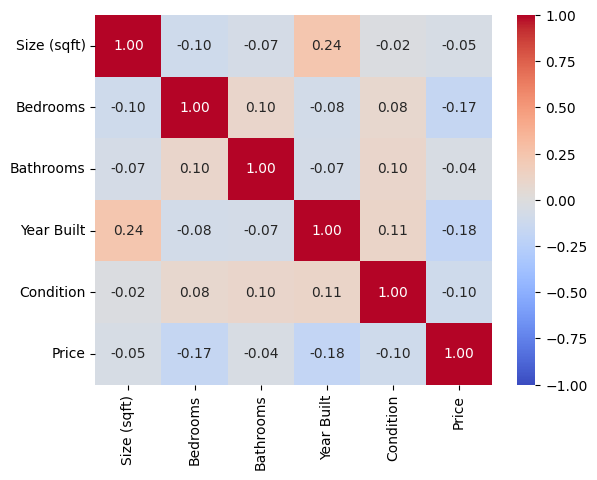

In [23]:
df_corr=df.select_dtypes(include='number').corr()
sns.heatmap(df_corr,annot=True,fmt=".2f",cmap='coolwarm',vmin=-1,vmax=1)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Size (sqft),1000.0,2113.144,766.567480,595.0,1538.0,2070.0,2737.0,3477.0
Bedrooms,1000.0,2.667,1.349790,1.0,1.0,3.0,4.0,5.0
Bathrooms,1000.0,1.990,0.804081,1.0,1.0,2.0,3.0,3.0
Year Built,1000.0,1984.981,21.170329,1950.0,1965.0,1983.0,2004.0,2019.0
Condition,1000.0,3.107,1.507921,1.0,2.0,3.0,5.0,5.0
Price,1000.0,282989.120,130220.566705,54748.0,172402.0,309747.0,391003.0,498345.0


Text(0, 0.5, 'Frequancy')

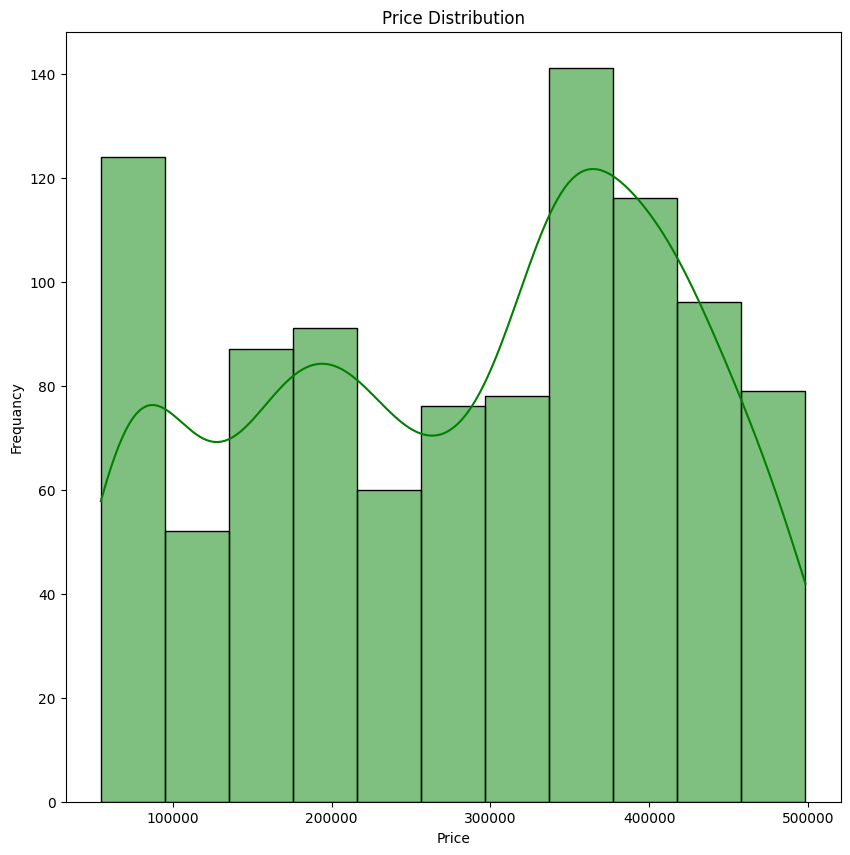

In [32]:
plt.figure(figsize=(10,10))
sns.histplot(x='Price',data=df,color='green',kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequancy')

Text(0, 0.5, 'Frequancy')

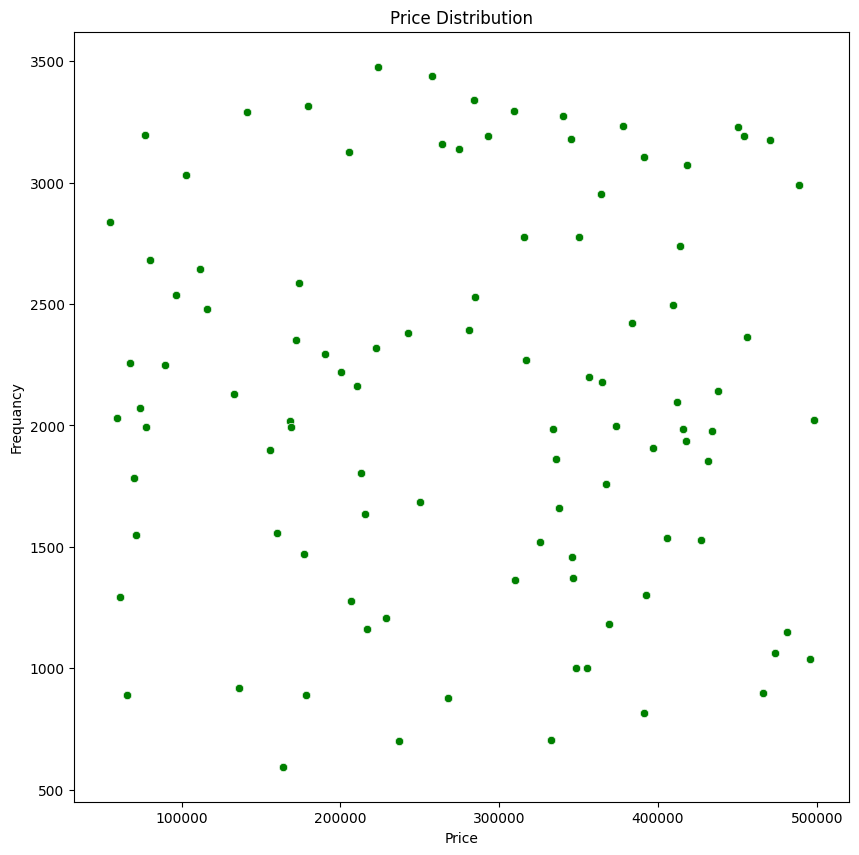

In [35]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Price',y='Size (sqft)',data=df,color='green')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequancy')

Text(0, 0.5, 'Price')

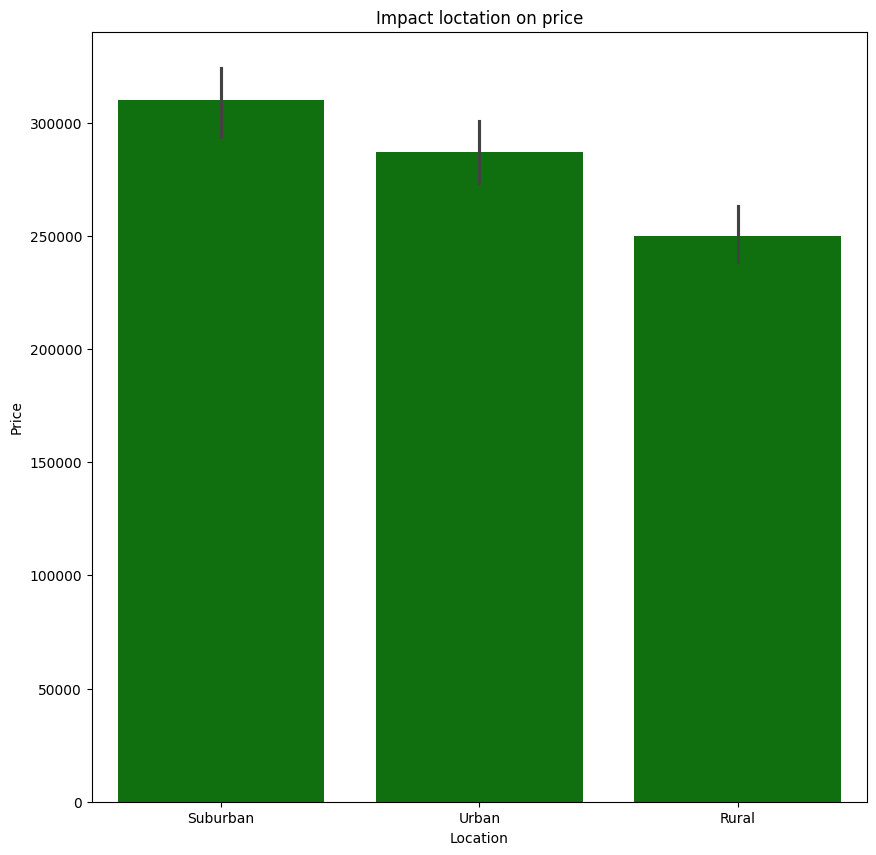

In [37]:
plt.figure(figsize=(10,10))
sns.barplot(x='Location',y='Price',data=df,color='green')
plt.title('Impact loctation on price')
plt.xlabel('Location')
plt.ylabel('Price')

# 3.Data_Preparation

In [72]:
df.isna().sum()

Location       0
Size (sqft)    0
Bedrooms       0
Bathrooms      0
Year Built     0
Condition      0
Price          0
dtype: int64

In [73]:
from sklearn.preprocessing import LabelEncoder
le_col=['Location']
le={}
for col in le_col:
    le[col]=LabelEncoder()
    df[col]=le[col].fit_transform(df[col])

In [74]:
joblib.dump(le,'le_col.pkl')

['le_col.pkl']

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Location     1000 non-null   int32
 1   Size (sqft)  1000 non-null   int64
 2   Bedrooms     1000 non-null   int64
 3   Bathrooms    1000 non-null   int64
 4   Year Built   1000 non-null   int64
 5   Condition    1000 non-null   int64
 6   Price        1000 non-null   int64
dtypes: int32(1), int64(6)
memory usage: 50.9 KB


In [81]:
from sklearn.preprocessing import StandardScaler

In [83]:
df.columns

Index(['Location', 'Size (sqft)', 'Bedrooms', 'Bathrooms', 'Year Built',
       'Condition', 'Price'],
      dtype='object')

In [85]:
std_col=['Size (sqft)', 'Bedrooms', 'Bathrooms', 'Year Built','Condition']
std=StandardScaler()
df[std_col]=std.fit_transform(df[std_col])

In [87]:
joblib.dump(std,'std_col.pkl')

['std_col.pkl']

In [89]:
df.head(4)

,Location,Size (sqft),Bedrooms,Bathrooms,Year Built,Condition,Price
0,1,-1.067816,1.729282,-1.231835,1.040608,1.255999,61023
1,2,-1.240099,-1.235625,1.256721,-1.133331,-1.397988,216619
2,2,-0.121569,-1.235625,0.012443,-0.093621,1.255999,168012
3,1,-1.088699,-0.494398,-1.231835,0.898830,-1.397988,206542


# 4.Modeling

In [96]:
 from sklearn.model_selection import train_test_split

In [97]:
x=df.drop('Price',axis=1)
y=df['Price']

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [101]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestRegressor()

In [103]:
joblib.dump(lr,'model.pkl')

['model.pkl']

In [104]:
y_pred_lr=lr.predict(x_test)
y_pred_dt=dt.predict(x_test)
y_pred_rf=rf.predict(x_test)

# 5.Evaluation

In [105]:
print('lr MSE',mean_squared_error(y_test,y_pred_lr))
print('dt MSE',mean_squared_error(y_test,y_pred_dt))
print('rf MSE',mean_squared_error(y_test,y_pred_rf))

lr MSE 15770483148.400627
dt MSE 0.0
rf MSE 1242405.9672374977


In [106]:
print('lr MAE',mean_absolute_error(y_test,y_pred_lr))
print('dt MAE',mean_absolute_error(y_test,y_pred_dt))
print('rf MAE',mean_absolute_error(y_test,y_pred_rf))

lr MAE 109912.47385351837
dt MAE 0.0
rf MAE 365.12014999999985


In [110]:
print('r2_score lr',r2_score(y_test,y_pred_lr))
print('r2_score dt',r2_score(y_test,y_pred_dt))
print('r2_score rf',r2_score(y_test,y_pred_rf))

r2_score lr 0.06591055803266965
r2_score dt 1.0
r2_score rf 0.9999264120010964


<function matplotlib.pyplot.show(close=None, block=None)>

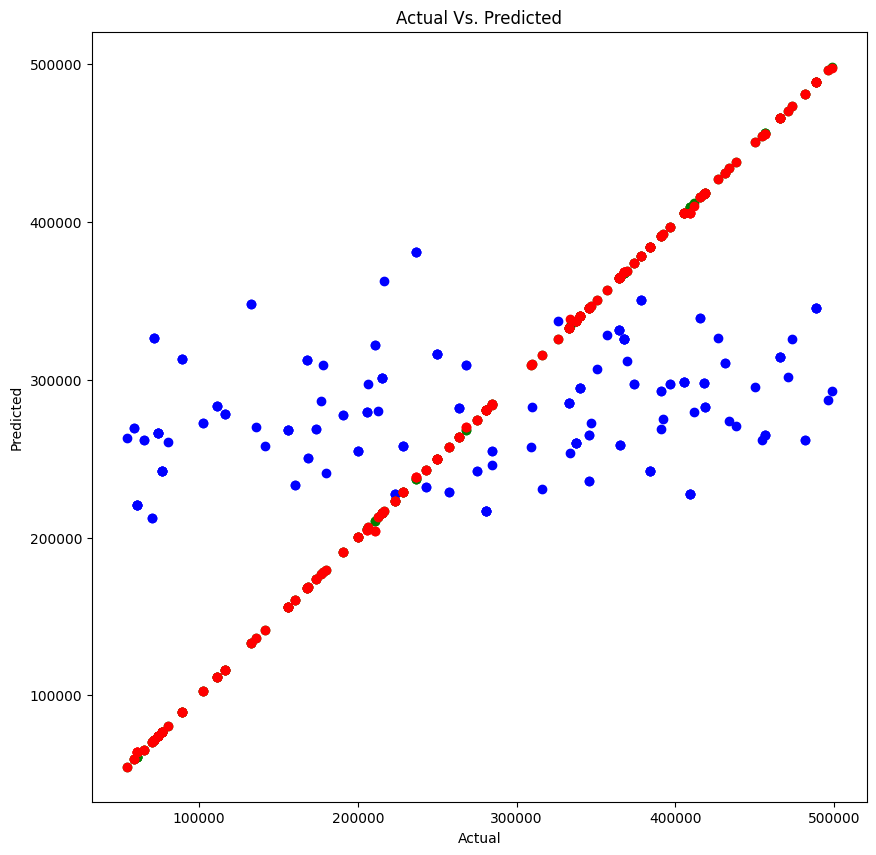

In [113]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test,y=y_pred_lr,color='blue')
plt.scatter(x=y_test,y=y_pred_dt,color='green')
plt.scatter(x=y_test,y=y_pred_rf,color='red')
plt.title('Actual Vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show

In [32]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# using GridSearchCV
grid_pram={'max_depth':[5,10,15,30],'max_leaf_nodes':[10,20,30,50,15,5,7]}
grid_search_model=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=grid_pram,cv=5)
grid_search_model.fit(x_train,y_train)
grid_search_model.best_params_

{'max_depth': 15, 'max_leaf_nodes': 50}

In [33]:
grid_y_predict=grid_search_model.best_estimator_.predict(x_test)

In [34]:
print('r2_Score GridSearchCV',r2_score(y_test,grid_y_predict))
print('MSE GridSearchCV',mean_squared_error(y_test,grid_y_predict))
print('MAE GridSearchCV',mean_absolute_error(y_test,grid_y_predict))

r2_Score GridSearchCV 0.9646924910607075
MSE GridSearchCV 596106164.7012935
MAE GridSearchCV 17223.220838076657


In [45]:
rondom_pram={'max_depth':[5,15,10,20],'n_estimators':[100,200,300,400]}
rondom_model=RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=rondom_pram,cv=5)
rondom_model.fit(x_train,y_train)
rondom_model.best_params_

{'n_estimators': 400, 'max_depth': 15}

In [47]:
rondom_y_predict=rondom_model.best_estimator_.predict(x_test)

In [49]:
print('r2_Score RandomizedSearchCV',r2_score(y_test,rondom_y_predict))
print('MSE RandomizedSearchCV',mean_squared_error(y_test,rondom_y_predict))
print('MAE RandomizedSearchCV',mean_absolute_error(y_test,rondom_y_predict))

r2_Score RandomizedSearchCV 0.9999356435846194
MSE RandomizedSearchCV 1086546.6610073594
MAE RandomizedSearchCV 427.70599605450406


In [54]:
df.head()

,Location,Size (sqft),Bedrooms,Bathrooms,Year Built,Condition,Price
0,1,-1.067816,1.729282,-1.231835,1.040608,1.255999,61023
1,2,-1.240099,-1.235625,1.256721,-1.133331,-1.397988,216619
2,2,-0.121569,-1.235625,0.012443,-0.093621,1.255999,168012
3,1,-1.088699,-0.494398,-1.231835,0.898830,-1.397988,206542
4,2,0.202113,-1.235625,-1.231835,-1.133331,-0.734491,316979


# 6.Deployment

In [61]:
# !pip install gradio

In [53]:
import gradio as gr

In [123]:
def Predict_house_price(Location,Size,Bedrooms,Bathrooms,Yearbuilt,Condition):
    input_data=pd.DataFrame({
        'Location':[Location],
        'Size (sqft)':[Size],
        'Bedrooms':[Bedrooms],
        'Bathrooms':[Bathrooms],
        'Year Built':[Yearbuilt],
        'Condition':[Condition]
    })
    for col in le_col:
        input_data[col]=le[col].transform(input_data[col])
    input_data[std_col]=std.transform(input_data[std_col])
    prediction=lr.predict(input_data)
    return prediction[0]
    # return f"Predicted House Preice: ${prediction[0]:,.2f}"
gr.Interface(
        fn=Predict_house_price,
    inputs=[
        gr.Dropdown(
            ["Suburban","Urban","Rural"],label="Location"),
        gr.Number(label="Size (sqft)"),
        gr.Number(label="Bedrooms"),
        gr.Number(label="Bathrooms"),
        gr.Number(label="Year Built"),
        gr.Number(label="Condition")
    ],
    outputs=gr.Textbox(label='prediction'),
    title='Prediction Housin Price'
).launch()

* Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.
